In [1]:
import joblib 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
merged_df=pd.read_pickle("data_9._merged.pkl")

In [4]:
merged_df

,27,104,133,134,149,199,position,position_x,position_y
sequence_number,,,,,,,,,
11739,10.186,16.286,27.410,28.640,13.924,3.786,"[[9.62, 1.19]]",9.62,1.19
11740,10.198,16.286,27.410,28.604,13.924,3.786,"[[10.22, 1.19]]",10.22,1.19
11743,10.216,16.286,27.410,28.604,13.924,3.808,"[[10.28, 1.17]]",10.28,1.17
11746,10.200,16.342,27.410,28.604,13.980,3.780,"[[9.75, 0.65]]",9.75,0.65
11747,10.208,16.294,27.410,28.604,13.954,3.762,"[[9.77, 0.84]]",9.77,0.84
...,...,...,...,...,...,...,...,...,...
12069,3.790,14.416,30.170,27.896,17.788,10.160,"[[3.63, -0.69]]",3.63,-0.69
12070,3.828,14.416,30.150,27.896,17.782,10.160,"[[3.71, -0.69]]",3.71,-0.69
12071,3.828,14.416,30.178,27.896,17.782,10.170,"[[3.27, -0.33]]",3.27,-0.33


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import joblib


X = merged_df[[27, 104, 133, 134, 149, 199]].values  # ANCHOR NUMBERS 
y_x = merged_df['position_x'].values  
y_y = merged_df['position_y'].values  

x_train, x_test, y_train_x, y_test_x = train_test_split(X, y_x, test_size=0.2, random_state=12)
x_train, x_test, y_train_y, y_test_y = train_test_split(X, y_y, test_size=0.2, random_state=12)

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=3)
}

results = pd.DataFrame(columns=["Model", "Coordinate", "MAE", "MSE"])
predictions = {}

for model_name, model in models.items():
    
    
    model.fit(x_train, y_train_x)
    predictions_x = model.predict(x_test)
    mae_x = mean_absolute_error(y_test_x, predictions_x)
    mse_x = mean_squared_error(y_test_x, predictions_x)
    joblib.dump(model, f"{model_name}_X.pkl")
    
    model.fit(x_train, y_train_y)
    predictions_y = model.predict(x_test)
    mae_y = mean_absolute_error(y_test_y, predictions_y)
    mse_y = mean_squared_error(y_test_y, predictions_y)
    joblib.dump(model, f"{model_name}_Y.pkl")
    
    
    results = pd.concat([results, 
        pd.DataFrame({
            "Model": [model_name, model_name],
            "Coordinate": ["X", "Y"],
            "MAE": [mae_x, mae_y],
            "MSE": [mse_x, mse_y]
        })
    ])
    
    predictions[model_name] = (predictions_x, predictions_y)


Model Performansları:
                  Model Coordinate       MAE       MSE
0    Linear Regression          X  0.451376  0.495066
1    Linear Regression          Y  0.467335  0.402753
0        Decision Tree          X  0.252424  0.114882
1        Decision Tree          Y  0.525758  0.598258
0  K-Nearest Neighbors          X  0.263737  0.127167
1  K-Nearest Neighbors          Y  0.448283  0.521412


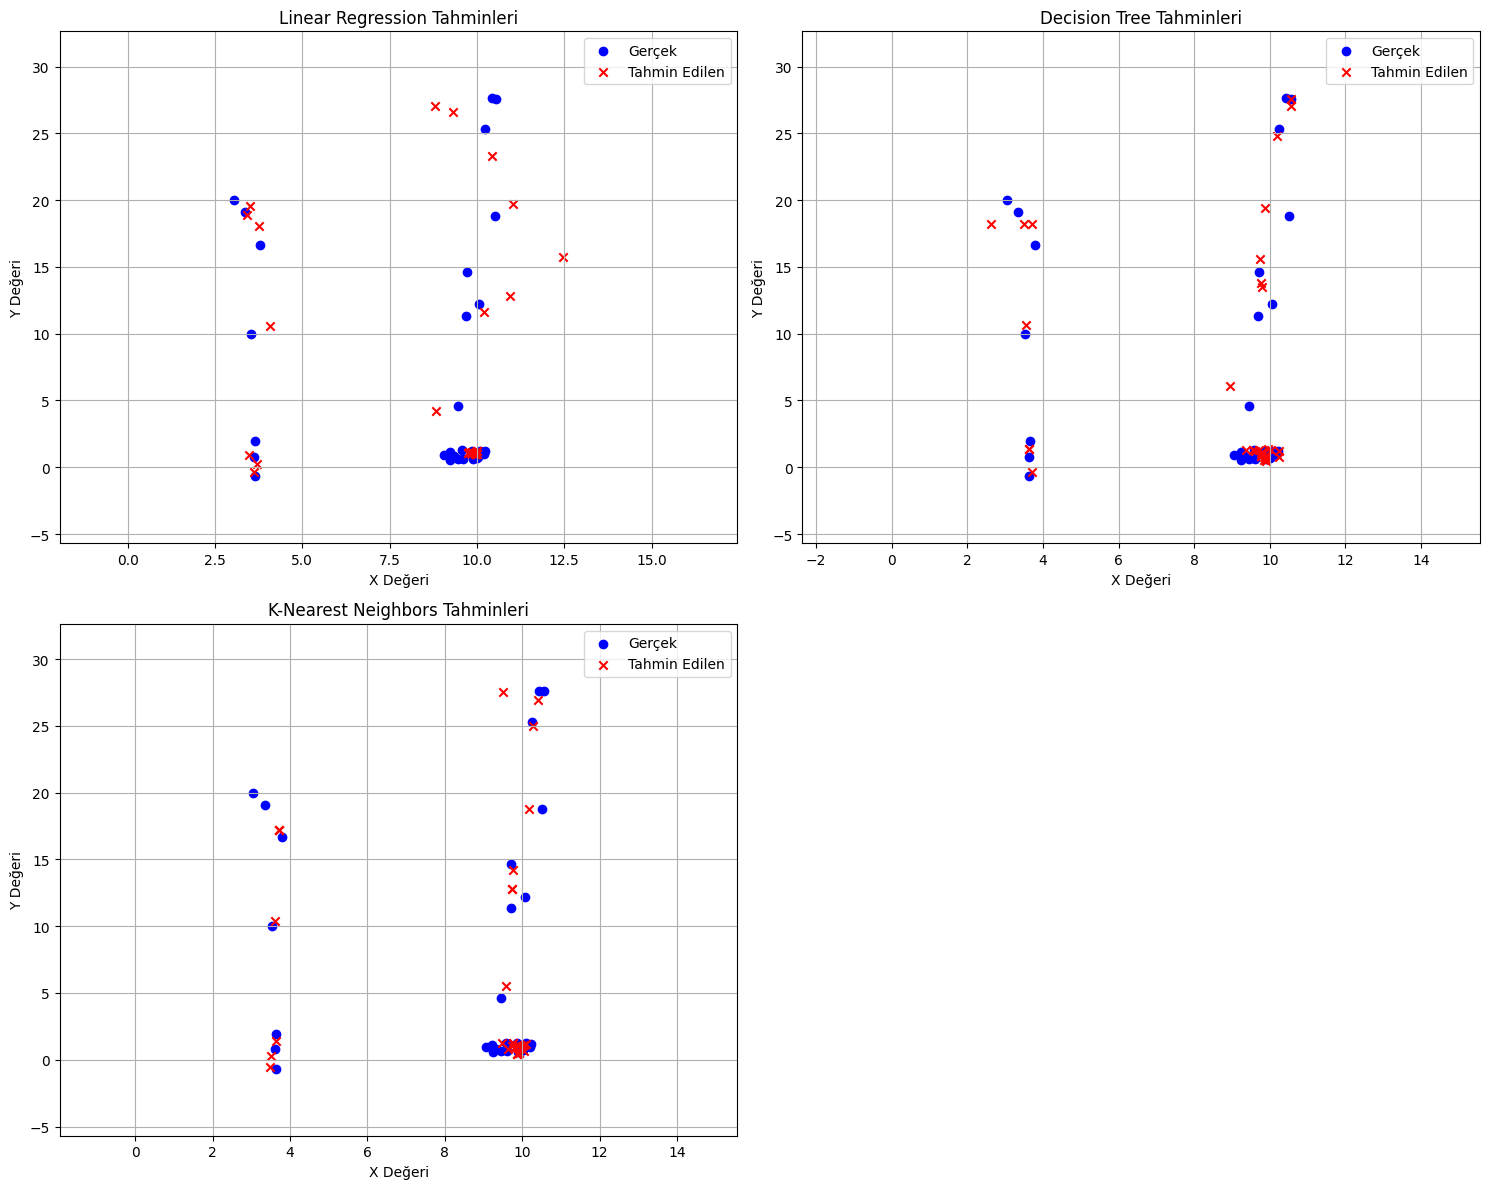

In [ ]:
print("Model Performansları:\n", results)


plt.figure(figsize=(15, 12))

for i, (model_name, (predictions_x, predictions_y)) in enumerate(predictions.items()):
    plt.subplot(2, 2, i + 1)
    plt.scatter(y_test_x, y_test_y, color='blue', label='Gerçek', marker='o')
    plt.scatter(predictions_x, predictions_y, color='red', label='Tahmin Edilen', marker='x')
    
    plt.title(f'{model_name} Tahminleri')
    plt.xlabel('X Değeri')
    plt.ylabel('Y Değeri')
    plt.legend()
    plt.grid(True)
    
    plt.xlim(min(np.concatenate((y_test_x, predictions_x))) - 5, max(np.concatenate((y_test_x, predictions_x))) + 5)
    plt.ylim(min(np.concatenate((y_test_y, predictions_y))) - 5, max(np.concatenate((y_test_y, predictions_y))) + 5)

plt.tight_layout()
plt.show()
